# SLM Spring semester 2023/2024 Practical lab exam

Please send filled notebook with index number in the file name to lkrain@sgh.waw.pl.

## Task 1 (20pkt)

**(2p)** Load data from URL http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric into `DataFrame`. Data doesn't have a header. Use URL directly in a function call, not a local file.

In [33]:
import pandas as pd

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric"
data_set = pd.read_fwf(url, header=None)
data_set

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,2,17,1,4,2,4,1,31,...,0,0,1,0,0,1,0,1,0,1
996,1,30,2,39,1,3,1,4,2,40,...,0,1,1,0,0,1,0,0,0,1
997,4,12,2,8,1,5,3,4,3,38,...,0,0,1,0,0,1,0,0,1,1
998,1,45,2,18,1,3,3,4,4,23,...,0,0,1,0,0,0,0,0,1,2


**(1p)** Rename last column to `target`. Column informs about the client's default - 2 => default, 1=> not default. Recode `target` so that defaulting clients are marked as 1 and 0 otherwise.

In [34]:
data_set.rename(columns={24: "target"}, inplace=True)
data_set['target'] = data_set['target'] - 1
data_set

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,target
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,0
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,1
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,0
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,0
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,2,17,1,4,2,4,1,31,...,0,0,1,0,0,1,0,1,0,0
996,1,30,2,39,1,3,1,4,2,40,...,0,1,1,0,0,1,0,0,0,0
997,4,12,2,8,1,5,3,4,3,38,...,0,0,1,0,0,1,0,0,1,0
998,1,45,2,18,1,3,3,4,4,23,...,0,0,1,0,0,0,0,0,1,1


**(3p)** Check and provide count of `target` categories. How can one solve unbalanced data problem? Give 3 examples.

In [35]:
target_counts = data_set['target'].value_counts()
print(target_counts)

target
0    700
1    300
Name: count, dtype: int64


**(2p)** Split data into training **(85%)** and validation **(15%)** datasets with random seed of **32**. Target variable is `target`, all other variables are predictors.

In [36]:
from sklearn.model_selection import train_test_split

X = data_set.drop(['target'], axis=1)
y = data_set['target']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.15,
                                                    random_state=32)

**(2p)** Train `sklearn.linear_model.LogisticRegression`. Make sure the model **is not** regularized. How many parameters in the model are different from 0?

In [37]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(penalty=None, max_iter=1000)
model1.fit(X_train,y_train)

LogisticRegression(max_iter=1000, penalty=None)

**(2p)** Perform feature selection (train new `sklearn.linear_model.LogisticRegression` model) by setting proper regularization type. Set random seed to **11** and set hyperparameter responsible for strength of regularization to **0.5**. How many model's parameters are different from 0? 

In [38]:
import numpy as np

model_1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.5, random_state=11)
model_1.fit(X_train,y_train)

coefficients = model_1.coef_[0]

print(np.sum(coefficients !=0))

20


**(2p)** How **Elastic net** is connected with **L1** and **L2** regularization?

Elastic Net is the combination between L1 and L2 regularization. The Elastic Net is controlled by 2 hyperparameteres:
- alpha
- l1_ratio: between 0 and 1. 
    - If l1_ratio = 0: L2 regularization
    - If l1_ratio = 1: L1 regularization
    - Between 0 and 1: Mixed between L1 and L2 regularization

**(3p)** Using model after feature selection calculate cost of predictions on validation data. False Positive cost is **2**, and False Negative is **5**. Use cut-off threshold of **0.4**.

In [39]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

y_test_hat = model_1.predict_proba(X_test)[:,1]
y_test_hat_binary = y_test_hat >= 0.4
confm = confusion_matrix(y_test, y_test_hat_binary)

FP_Cost = confm[0,1] * 2
FN_Cost = confm[1,0] * 5

total_cost = FP_Cost + FN_Cost
print(total_cost)

131


**(3p)** Given the following confusion matrix:

Predictions are in columns, true labels in rows.

| A\P | 1   | 0   |
|-----|-----|-----|
| 1   | 123 | 321 |
| 0   | 324 | 456 |

Calculate:
* Accuracy
* Precision
* Recall
* F1-score

In [13]:
df = pd.DataFrame([[123, 321], [324,456]])

TP = df.iloc[0,0]
FP = df.iloc[1,0]
TN = df.iloc[1,1]
FN = df.iloc[0,1]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1_score:.4f}')

Accuracy: 0.4730
Precision: 0.2752
Recall: 0.2770
F1-Score: 0.2761


## Task 2 (12 pkt)

**(1p)** Load data from URL https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv into `DataFrame`. Use URL directly in a function call, not a local file.

In [41]:
import pandas as pd

url_2 = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"

data_set_2 = pd.read_csv(url_2, header=0, sep=',')
data_set_2

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


**(1p)** Drop all qualitative variables from the dataset.

In [42]:
categorical_columns = data_set_2.select_dtypes(include=['object']).columns
data_set_2 = data_set_2.drop(columns=categorical_columns)
data_set_2

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
882,0,2,27.0,0,0,13.0000
883,1,1,19.0,0,0,30.0000
884,0,3,7.0,1,2,23.4500
885,1,1,26.0,0,0,30.0000


**(1p)** Split data into training **(85%)** and validation **(15%)** datasets with random seed of **42**. Target variable is `Survived`, all other variables are predictors.

In [43]:
from sklearn.model_selection import train_test_split

X = data_set_2.drop(['Survived'], axis=1)
y = data_set_2['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.15,
                                                    random_state=42)

**(1p)** Train `sklearn.tree.DecisionTreeClassifier` model with random seed of **42** i and cost parameter equal to **0**.

In [44]:
from sklearn.ensemble import RandomForestClassifier as RFC, GradientBoostingClassifier as GBC
from sklearn.tree import plot_tree, DecisionTreeClassifier as CART

titanic_tree = CART(random_state=42, ccp_alpha=0.0).fit(X_train, y_train)

**(3p)** How and why CART tree pruning is performed?

We can use Cost-Complexity Pruning method for CART tree pruning. And the reason for CART tree pruning is prevent overfitting, interpretability and Computational Effeciency.

**(2p)** Prune trained tree by optimizing complexity parameter. Use **grid search** for **50** values of complexity parameter from 0 to maximum value of cost obtained from `cost_complexity_pruning_path` used on trained tree (use training dataset while calling the method). Use **accuracy** as quality metric. Use random seed of **42** for all model trained during tuning.

In [46]:
path = titanic_tree.cost_complexity_pruning_path(X_train, y_train)

ccp_alpha, impurities = path.ccp_alphas, path.impurities

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

param_grid = {'ccp_alpha': ccp_alpha}

tuning_res_cart = GridSearchCV(titanic_tree,
                             param_grid=param_grid,
                             scoring='accuracy',
                             cv=3,
                             )
tuning_res_cart.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': array([0.        , 0.        , 0.        , 0.00012648, 0.00017707,
       0.00022134, 0.00033201, 0.00033201, 0.00033201, 0.00036889,
       0.00039841, 0.00040243, 0.00044267, 0.00044267, 0.00044267,
       0.00059023, 0.00062495, 0.00064892, 0.00070828, 0.00070828,
       0.00075887, 0.00080836, 0.00081724, 0.00082211, 0.00084417,...
       0.00157782, 0.00159895, 0.00161576, 0.00170126, 0.00177069,
       0.00189492, 0.00189754, 0.00196578, 0.00198425, 0.00199203,
       0.00202365, 0.0020804 , 0.00212483, 0.00213037, 0.00231552,
       0.00234357, 0.00245173, 0.00247897, 0.00264469, 0.00265046,
       0.00280703, 0.00326726, 0.00327402, 0.00379435, 0.00388422,
       0.00418017, 0.00464888, 0.00471457, 0.00560396, 0.01133877,
       0.01447387, 0.01785025, 0.052315  ])},
             scoring='accuracy')

**(3p)** What is the optimal value of cost parameter? Provide accuracy of pruned tree on training and validation datasets - comment if the model is overfitted.

In [49]:
from sklearn.metrics import accuracy_score

tuning_res_cart.best_estimator_

train_accuracy = accuracy_score(y_train, tuning_res_cart.predict(X_train))
test_accuracy = accuracy_score(y_test, tuning_res_cart.predict(X_test))

print(train_accuracy)
print(test_accuracy)

print("Model is Overfitting")


0.7450199203187251
0.6791044776119403
Model is Overfitting


## Task 3 (18 pkt)

**(1p)** Load data from URL https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv into DataFrame. Use URL directly in a function call, not a local file.

In [22]:
url_3 = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

data_set_3 = pd.read_csv(url_3, sep = ';')
data_set_3

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


**(1p)** Check if dataset contains missing data.

In [24]:
data_set_3.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**(2p)** Create a scatterplot with overlayed linear regression. Use variables:
* y axis - `alcohol`
* x axis - `residual sugar`

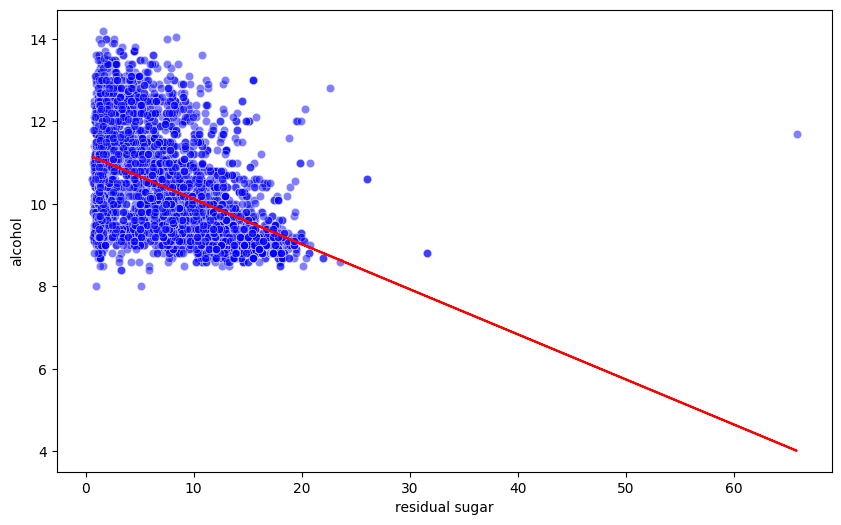

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

alcolhol = data_set_3['alcohol']
residual_sugar = data_set_3['residual sugar']

plt.figure(figsize=(10,6))
sns.scatterplot(x=residual_sugar, y=alcolhol, color='blue', alpha=0.5)

model_LN = LinearRegression()
model_LN.fit(residual_sugar.values.reshape(-1,1), alcolhol.values.reshape(-1,1))

plt.plot(residual_sugar,model_LN.predict(residual_sugar.values.reshape(-1,1)), color='red')
plt.show()



**(3p)** Plot highlights presence of outliers - remove them with z-score method. Calculate z-score for all observations in the dataset and remove rows in which, at least one variable is greater than **4** standard deviations from mean. Generate chart from previous point again to confirm outliers removal.

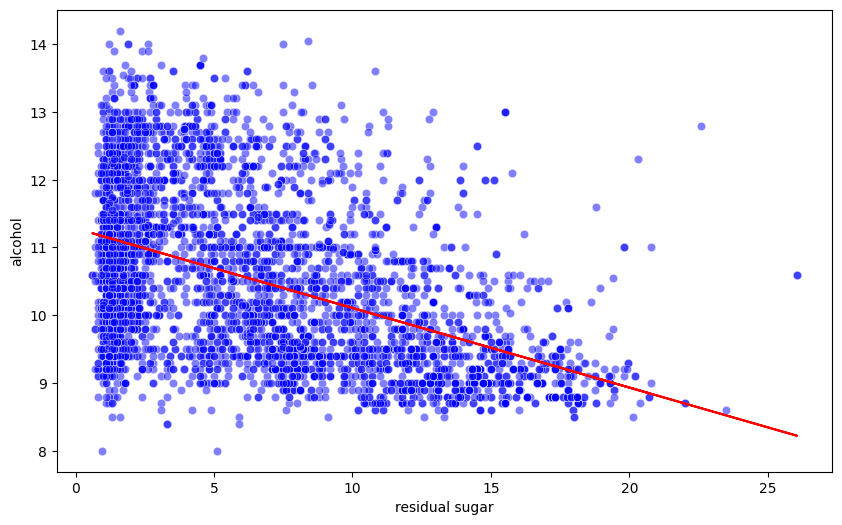

In [26]:
from scipy.stats import zscore

z_scores = data_set_3.apply(zscore)

data_set_3_no_outliers = data_set_3[(z_scores.abs() < 4).all(axis=1)]

alcolhol = data_set_3_no_outliers['alcohol']
residual_sugar = data_set_3_no_outliers['residual sugar']

plt.figure(figsize=(10,6))
sns.scatterplot(x=residual_sugar, y=alcolhol, color='blue', alpha=0.5)

model_LN = LinearRegression()
model_LN.fit(residual_sugar.values.reshape(-1,1), alcolhol.values.reshape(-1,1))

plt.plot(residual_sugar,model_LN.predict(residual_sugar.values.reshape(-1,1)), color='red')
plt.show()

**(1p)** Recode `quality` column. Good wines (quality greater or equal **6**) should be marked as 1, while bad wines (quality lower than 6) marked as 0. Overwrite `quality` column.

In [27]:
import numpy as np
data_set_3['quality'] = np.where(data_set_3['quality'] >=6, 1, 0)
data_set_3 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


**(1p)** Split data into training **(80%)** and test **(20%)** subsets with random seed of **42**. Target variable is `quality`, all other variables are predictors.

In [28]:
from sklearn.model_selection import train_test_split

X = data_set_3.drop(['quality'], axis=1)
y = data_set_3['quality']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

**(2p)** Tune the `sklearn.ensemble.RandomForestClassifier` model. Optimize `max_samples` hyperparameter using grid search (check values 0.1, 0.2, ..., 1.0) - use 3-fold crossvalidation and F1-score as quality metric. For every trained model use random seed of **10**. Other hyperparameters in the model leave with default values. 

In [29]:
from sklearn.ensemble import RandomForestClassifier as RFC, GradientBoostingClassifier as GBC
from sklearn.tree import plot_tree, DecisionTreeClassifier as CART
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

grid = {
    'max_samples': np.arange(0.1, 1.1, 0.1)
}
tuning_res_rf = GridSearchCV(RFC(random_state=10),
                             param_grid=grid,
                             scoring=make_scorer(f1_score),
                             cv=3,
                             )
tuning_res_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=10),
             param_grid={'max_samples': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring=make_scorer(f1_score))

**(2p)** Which 2 features are the most important based on **feature importance** of optimal random forest? Give their names.

In [30]:
Best_RF = tuning_res_rf.best_estimator_
feature_importance = Best_RF.feature_importances_

top_two_indices = feature_importance.argsort()[-2:][::-1]

top_two_features = [X_train.columns[i] for i in top_two_indices]

print("Top two most important features:", top_two_features)

Top two most important features: ['alcohol', 'volatile acidity']


**(3p)** Tune `sklearn.ensemble.GradientBoostingClassifier`. 

Using grid search, tune two hyperparameters:
1. number of learning iterations (check values from 50 to 200 with step of 50)
2. fraction of training observations used in each iteration (check values 0.33, 0.66 and 1.0)

Use 3-fold crossvalidation and F1-score as quality metric. Use random seed of **12** for each model. Other hyperparameters in the model leave with default values.

In [31]:
dist = {'n_estimators': [50,100,150,200], 'subsample': [0.33, 0.66, 1.0]}
tuning_res_gbc = GridSearchCV(GBC(random_state=12),
                                    param_grid=dist,
                                    scoring=make_scorer(f1_score),
                                    cv=3
                                    )
tuning_res_gbc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=12),
             param_grid={'n_estimators': [50, 100, 150, 200],
                         'subsample': [0.33, 0.66, 1.0]},
             scoring=make_scorer(f1_score))

**(2p)** Compare quality of two tuned models (optimal Random Forest, optimal Gradient Boosted Trees) based on F1-score on test data and show the results on bar plot. Which model is better?

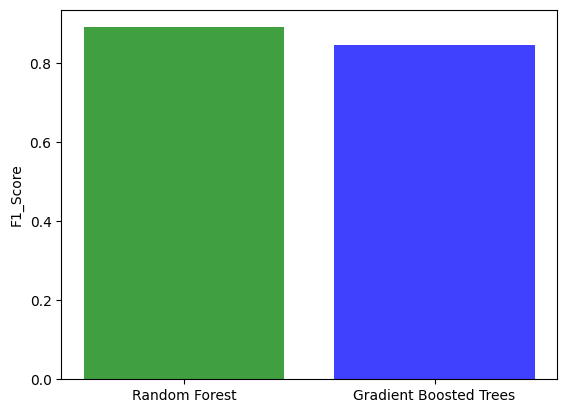

In [32]:
Best_GBC = tuning_res_gbc.best_estimator_

model_check = [Best_RF, Best_GBC]

f1_test = [f1_score(m.predict(X_test), y_test) for m in model_check]

plt.bar(['Random Forest', 'Gradient Boosted Trees'],
        f1_test,
        color=['green', 'blue'],
        alpha=0.75)
plt.ylabel('F1_Score')
plt.show()
